<a href="https://colab.research.google.com/github/clyde2020/ML_Portfolio/blob/main/US%20Cancer%20Death%20Rates/Capstone_2_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from pathlib import Path

import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn import linear_model, preprocessing 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load in data, process, split into test and train, scale

In [ ]:
cancer = '/content/cancer_reg.csv'
df = pd.read_csv(cancer, encoding='latin-1')
df.PctPrivateCoverageAlone = df.PctPrivateCoverageAlone.fillna(df.PctPrivateCoverageAlone.mean())
df.PctEmployed16_Over = df.PctEmployed16_Over.fillna(df.PctEmployed16_Over.mean())
df = df[df.MedianAge < 70]
df.drop(['Geography', 'binnedInc', 'PctSomeCol18_24'], axis=1, inplace=True)

X = df.drop('TARGET_deathRate', axis=1)
y = df['TARGET_deathRate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
y.describe()

count    3017.000000
mean      178.648194
std        27.737080
min        59.700000
25%       161.300000
50%       178.100000
75%       195.200000
max       362.800000
Name: TARGET_deathRate, dtype: float64

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,3017.0,607.573376,1422.111040,6.000000,76.000000,170.000000,515.000000,3.815000e+04
avgDeathsPerYear,3017.0,186.285714,506.346011,3.000000,28.000000,61.000000,147.000000,1.401000e+04
incidenceRate,3017.0,448.154402,54.608081,201.300000,420.300000,453.549422,480.800000,1.206900e+03
medIncome,3017.0,47060.539277,12053.191812,22640.000000,38887.000000,45207.000000,52476.000000,1.256350e+05
popEst2015,3017.0,102718.943984,330286.240541,827.000000,11703.000000,26589.000000,68502.000000,1.017029e+07
povertyPercent,3017.0,16.882400,6.416020,3.200000,12.200000,15.800000,20.400000,4.740000e+01
studyPerCap,3017.0,156.586892,532.071270,0.000000,0.000000,0.000000,83.896902,9.762309e+03
MedianAge,3017.0,40.823865,5.196933,22.300000,37.700000,40.900000,43.800000,6.530000e+01
MedianAgeMale,3017.0,39.568445,5.225173,22.400000,36.400000,39.500000,42.600000,6.470000e+01
MedianAgeFemale,3017.0,42.144216,5.297612,22.300000,39.100000,42.300000,45.300000,6.570000e+01


## Linear regression model

In [ ]:
pipe = make_pipeline(
    SelectKBest(f_regression),
    LinearRegression()
)

k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train, y_train)
y_preds = lr_grid_cv.predict(X_test)

print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))
print(lr_grid_cv.best_params_)

0.48679734483205317
14.756536335027839
410.59783386212314
{'selectkbest__k': 27}


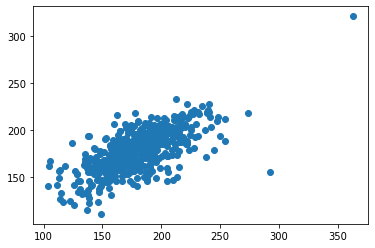

In [ ]:
pipe = make_pipeline(
    SelectKBest(f_regression, k=27),
    LinearRegression()
)

pipe.fit(X_train, y_train)
y_preds = pipe.predict(X_test)
plt.scatter(y_test, y_preds)

In [ ]:
print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))

0.48679734483205317
14.756536335027839
410.59783386212314


## Ordinary least squared model

In [ ]:
X_ols = sm.add_constant(X)
X_train_ols, X_test_ols, y_train, y_test = train_test_split(X_ols, y, test_size=0.25)
model = sm.OLS(y_train, X_train_ols)
model = model.fit()
model.summary()

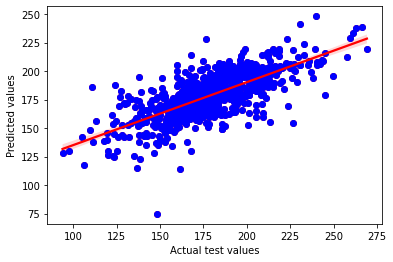

In [ ]:
y_preds = model.predict(X_test_ols)

_ = sns.regplot(y_test, y_preds, color='r')
_ = plt.scatter(y_test, y_preds, color='b')

# Label it nicely
_ = plt.xlabel('Actual test values')
_ = plt.ylabel('Predicted values')

In [ ]:
print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))

0.5273796620582059
13.859828641249003
342.5472677852406


## Random forest regression model

In [ ]:
n_estimators = [int(n) for n in np.logspace(start=1, stop=4, num=12)]
max_depth = [25, 50, 75]
param_grid = {'randomforestregressor__n_estimators': n_estimators,
              'randomforestregressor__max_depth': max_depth}

pipe = make_pipeline(
    StandardScaler(), 
    # SelectKBest(f_regression),
    RandomForestRegressor(random_state=42, n_jobs=-1)
)

gm_cv = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
gm_cv.fit(X_train, y_train)
y_preds = gm_cv.predict(X_test)

print(gm_cv.best_estimator_)
print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))
print(gm_cv.best_params_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_estimators=811,
                                       n_jobs=-1, random_state=42))])
0.5019624547220394
14.158498419905095
398.46469072966664
{'randomforestregressor__max_depth': 50, 'randomforestregressor__n_estimators': 811}


In [ ]:
clf = RandomForestRegressor(n_estimators=811, max_depth=50, random_state = 42,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_preds = model_res.predict(X_test_scaled)

print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))

0.5019624547220394
14.158498419905095
398.46469072966676


30


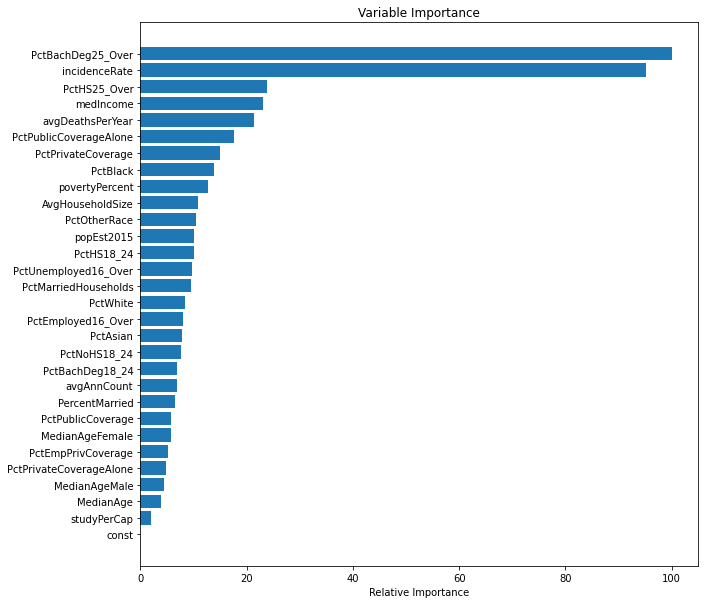

In [ ]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Gradient Boosting Regressor models

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
y2 = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_train, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
y3 = y2 - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
y_preds = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [ ]:
print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))

0.3260767887483824
17.144507696710477
539.1854620057757


In [ ]:
n_estimators = [2000, 3000, 5000, 7000]
learning_rate = [0.1, 0.2, 0.3]
max_depth = [2, 3, 4]
param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'learning_rate': learning_rate}

gb = GradientBoostingRegressor(random_state = 42)
gm_cv = GridSearchCV(gb, param_grid, cv=5, scoring='r2')
gm_cv.fit(X_train, y_train)
y_preds = gm_cv.predict(X_test)

print(gm_cv.best_estimator_)
print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))

GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=5000,
                          random_state=42)
0.7108546556839411
10.698448027020369
231.3363947983459


In [ ]:
gb = GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=5000, random_state = 42).fit(X_train, y_train)
y_preds = gb.predict(X_test)

print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))

0.7108546556839411
10.698448027020369
231.3363947983459


## ElasticNet model

In [ ]:
from sklearn.linear_model import ElasticNet

l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

elastic_net = ElasticNet()
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
gm_cv.fit(X_train, y_train)
y_preds = gm_cv.predict(X_test)

print(gm_cv.best_estimator_)
print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.441e+05, tolerance: 1.461e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.599e+05, tolerance: 1.444e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

ElasticNet(l1_ratio=0.3793103448275862)
0.49028574375654443
14.809710537236462
407.8068719923441


In [ ]:
elastic_net = ElasticNet(l1_ratio=0.38).fit(X_train, y_train)
y_preds = elastic_net.predict(X_test)
print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))

0.4902878521257279
14.809705755163641
407.80518515029263


In [ ]:
! pip install bayesian-optimization
! pip install catboost

## Beyesian optimization for parameters used in Light GBM regressor model

In [ ]:
import lightgbm
from bayes_opt import BayesianOptimization
from catboost import CatBoostClassifier, cv, Pool
from lightgbm import LGBMRegressor

In [ ]:
def lgb_eval(num_leaves,max_depth,lambda_l1, lambda_l2,learning_rate,min_child_samples, min_data_in_leaf):
    params = {
        "lambda_l2" : lambda_l2,
        "lambda_l1" : lambda_l1,
        "num_threads" : 20,
        "num_leaves" : int(num_leaves),
        "max_depth" : int(max_depth),
        "min_child_samples" : int(min_child_samples),
        'min_data_in_leaf': int(min_data_in_leaf),
        "learning_rate" : learning_rate,
        "objective" : "regression",
        "metric" : "mae", 
        # 'is_unbalance': True,
    }
    lgtrain = lightgbm.Dataset(X_train, y_train)
    cv_result = lightgbm.cv(params,
                       lgtrain,
                       1000,
                       early_stopping_rounds=100,
                       stratified=False,
                       metrics='mae',
                       nfold=3)
    return cv_result['l1-mean'][-1]

In [ ]:
lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (25, 4000),
                                        'max_depth': (5, 63),
                                        'lambda_l2': (0.0, 0.05),
                                        'lambda_l1': (0.0, 0.05),
                                        'min_child_samples': (50, 10000),
                                        'min_data_in_leaf': (100, 2000),
                                        'learning_rate': (1e-4, 1e-1),
                                        })

lgbBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------------------
|  1        |  178.6    |  0.02553  |  0.03959  |  0.03556  |  15.65    |  4.95e+03 |  895.1    |  3.884e+0 |
|  2        |  15.24    |  0.03197  |  0.000992 |  0.01287  |  59.23    |  1.792e+0 |  510.8    |  3.031e+0 |
|  3        |  178.6    |  0.009569 |  0.03376  |  0.05555  |  44.63    |  8.238e+0 |  1.678e+0 |  1.264e+0 |
|  4        |  15.79    |  0.00144  |  0.03039  |  0.001155 |  16.78    |  2.368e+0 |  108.7    |  1.61e+03 |
|  5        |  11.53    |  0.05     |  0.05     |  0.1      |  5.0      |  8.058e+0 |  100.0    |  4e+03    |
|  6        |  14.8     |  0.01977  |  0.002226 |  0.02652  |  7.476    |  7.559e+0 |  477.9    |  2.378e+0 |
|  7        |  16.83    |  0.02399  |  0.04048  |  0.03645  |  20.83    |  8.704e+0 |  760.6    |  3.171e+0 |
|  8      

In [ ]:
params = lgbBO.max['params']

In [ ]:
params['num_leaves'] = int(params['num_leaves'])
params['max_depth'] = int(params['max_depth'])
params['min_data_in_leaf'] = int(params['min_data_in_leaf'])

In [ ]:
light_model = LGBMRegressor(**params)

In [ ]:
light_model.fit(X_train, y_train)

LGBMRegressor(lambda_l1=0.02552649376964952, lambda_l2=0.039589101486369155,
              learning_rate=0.03556192267647465, max_depth=15,
              min_child_samples=4950.270508977966, min_data_in_leaf=895,
              num_leaves=3884)

In [ ]:
y_preds = light_model.predict(X_test)

print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))

0.3339835373603467
17.063091581558105
532.8595129478886


## The best model is the Gradient booster regressor model with MSE of 231, though it takes a long time to train with 5000 estimators.